# 9. Feature Selection

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('8_data_analsys.csv')

In [3]:
#df = ff.reindex_noisydata(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104260 entries, 0 to 104259
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          104260 non-null  object 
 1   Num_Land            104260 non-null  int64  
 2   Num_Building        104260 non-null  int64  
 3   Num_ParkingSpace    104260 non-null  int64  
 4   Storeys             104260 non-null  float64
 5   Floor_Arabic        104260 non-null  float64
 6   Num_Floors          104260 non-null  float64
 7   HouseAge            104260 non-null  int64  
 8   CompletionYear      104260 non-null  int64  
 9   TransactionDate_AD  104260 non-null  int64  
 10  TransactionYear     104260 non-null  int64  
 11  TransactionMonth    104260 non-null  int64  
 12  Bedrooms            104260 non-null  int64  
 13  LivingRooms         104260 non-null  int64  
 14  Bathrooms           104260 non-null  int64  
 15  TotalArea           104260 non-nul

In [4]:
df.head()

Identifier  Num_Land  Num_Building  Num_ParkingSpace  Storeys  \
0  RPPNMLOJPHJFFAA17CA         1             1                 0      5.0   
1  RPPSMLSJJIOFFCA28CA         3             1                 0     18.0   
2  RPSNMLTLQHNFFFA56CA         2             1                 1     14.0   
3  RPRNMLTLOHKFFAA08CA         1             1                 0      4.0   
4  RPSNMLOKOHNFFAA87CA         1             1                 1     12.0   

   Floor_Arabic  Num_Floors  HouseAge  CompletionYear  TransactionDate_AD  \
0           2.0         1.0        31            1983              201405   
1          10.0         1.0         9            2010              201910   
2          13.0         1.0        -2            2018              201601   
3           1.0         1.0        38            1977              201504   
4           6.0         1.0         0            2018              201804   

   ...  Num_Sec_School   NIMBY_Dist  Hospital_Dist   Metro_Dist  Railway_Dist  \
0  ...               1  1927.848709     986.810123   580.619237   5518.296523   
1  ...               2  5737.663362    1252.993661    30.933473   1646.111526   
2  ...               2  4111.327471     828.428002   355.217298   2511.303778   
3  ...               2  2774.267401    1075.894739   815.794335   6311.609820   
4  ...               2  2769.399126    2020.580964  1371.877712   7063.465463   

   Primary_Dist    Sec_Dist  TotalPrice  UnitPrice_ping  TotalArea_ping  
0    434.611897  232.583754    11300000    3.787809e+05       29.832551  
1    289.361797  265.468281    15930000    9.397065e+05       16.952101  
2    332.255267  141.307329    33000000    1.051884e+06       31.372276  
3    137.567134  240.123920    13000000    4.456160e+05       29.173101  
4    432.853701  376.047718    55500000    6.244336e+05       88.880553  

[5 rows x 46 columns]

# 9-1. Numurical Data

In [5]:
df.drop(columns=['TransactionDate_AD', 'UnitPrice_ping', 'TotalArea_ping' ], axis=1, inplace=True)

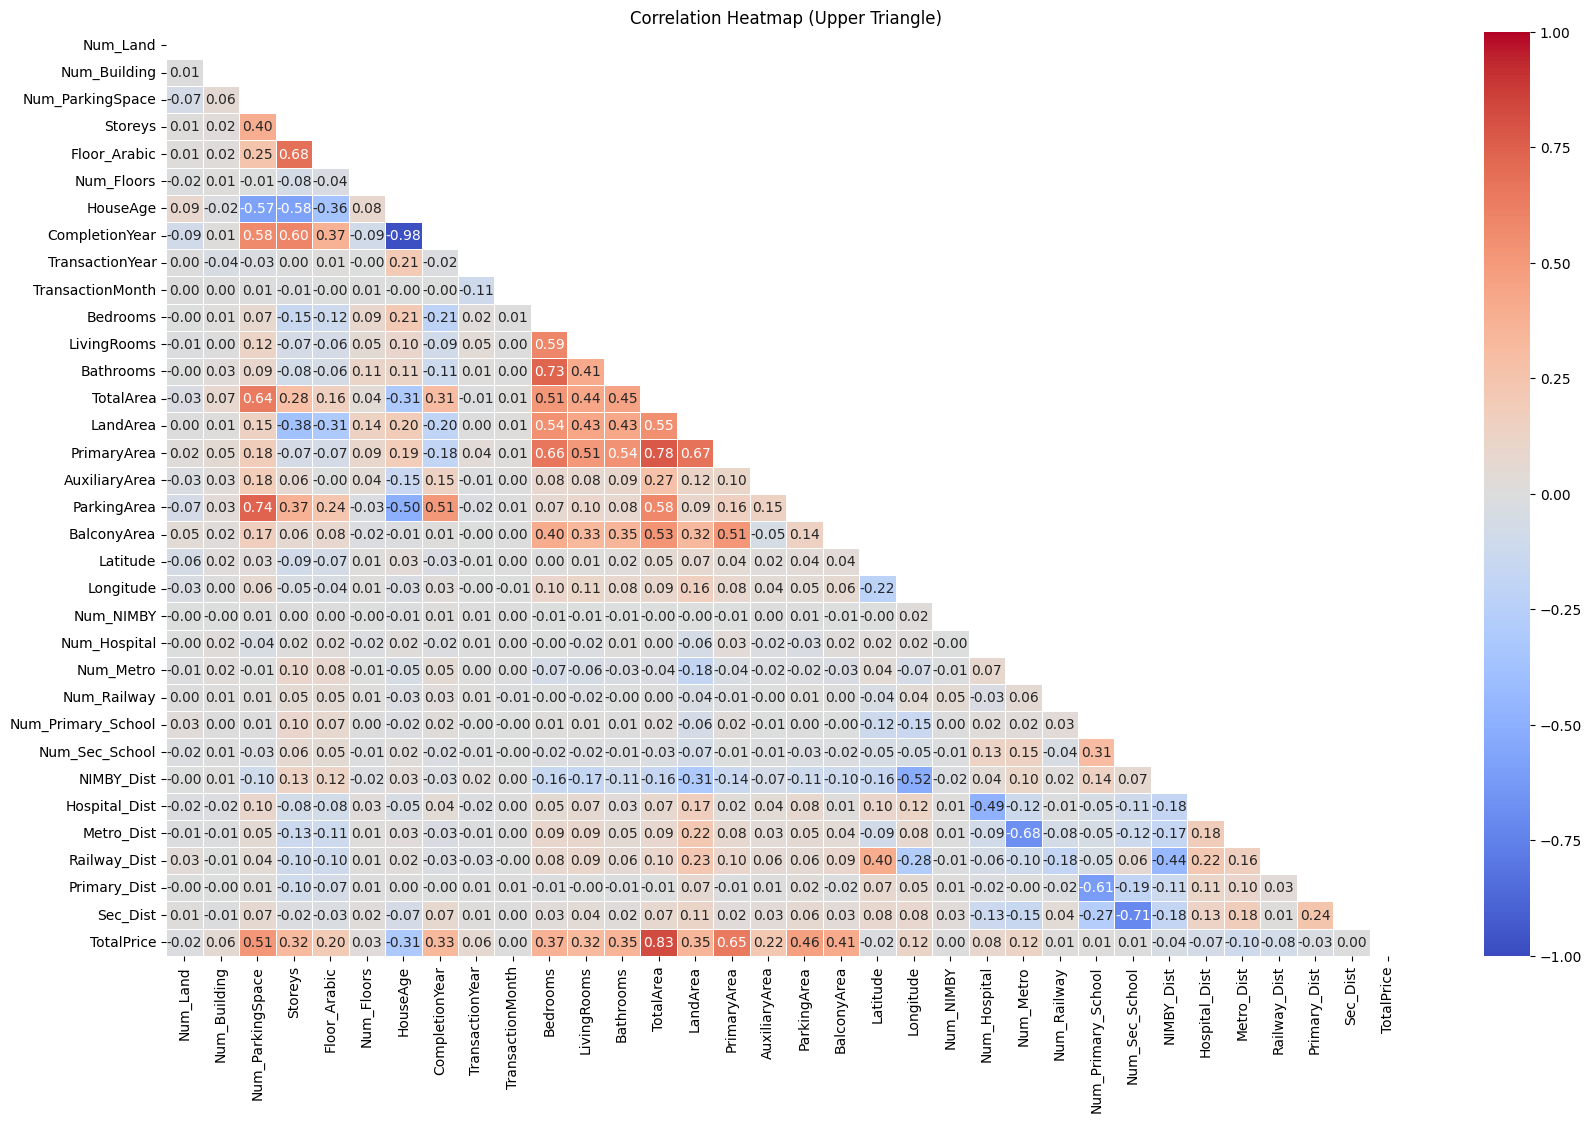

In [6]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df)

In [7]:
# See features have a correlation greater than 0.2 with the TotalPrice
df_num = df.select_dtypes(include = ['float64', 'int64'])
important_num = df_num.corr().loc['TotalPrice', (abs(df_num.corr()).TotalPrice > 0.2)& (df_num.corr().TotalPrice != 1)]
important_num

Num_ParkingSpace    0.511721
Storeys             0.315287
HouseAge           -0.309488
CompletionYear      0.328975
Bedrooms            0.370869
LivingRooms         0.319595
Bathrooms           0.353241
TotalArea           0.826590
LandArea            0.347350
PrimaryArea         0.645099
AuxiliaryArea       0.220874
ParkingArea         0.463983
BalconyArea         0.409425
Name: TotalPrice, dtype: float64

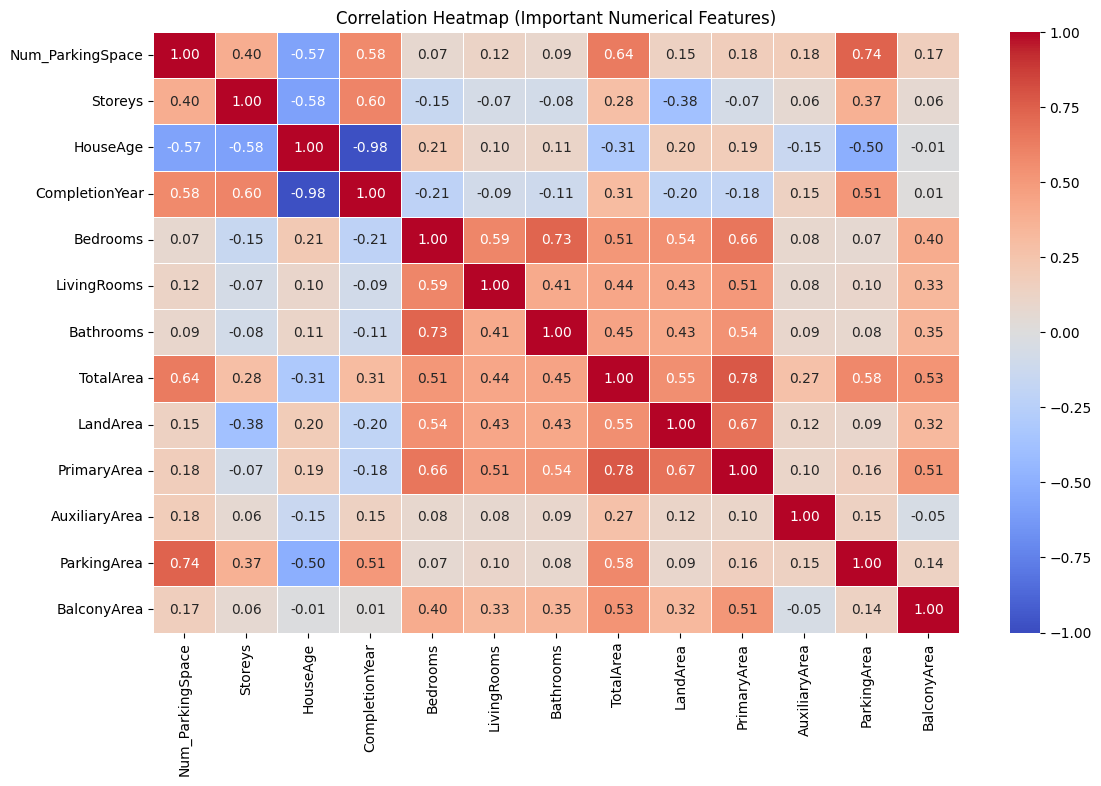

In [8]:
df_important = df[important_num.keys()]
title = 'Important Numerical Features'
pa.important_features_heatmap(df_important, title)

# Rooms

In [9]:
df_target = df_num.copy()

In [10]:
# See features have a correlation greater than 0.6 with the Bedrooms
important_num = df_target.corr().loc['Bedrooms', (abs(df_target.corr()).Bedrooms > 0.5)& (df_target.corr().Bedrooms != 1)]
important_num

LivingRooms    0.588046
Bathrooms      0.734039
TotalArea      0.512772
LandArea       0.544015
PrimaryArea    0.663560
Name: Bedrooms, dtype: float64

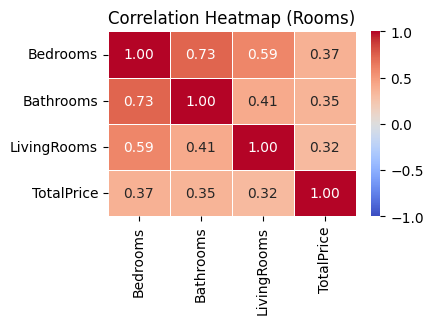

In [11]:
# Plot a Heatmap with rooms
df_rooms = df[['Bedrooms', 'Bathrooms', 'LivingRooms', 'TotalPrice']]
title = 'Rooms'
pa.important_features_heatmap(df_rooms, title)

In [12]:
# Merge 'Bedrooms', 'Bathrooms' and 'LivingRooms'
df['Total_Rooms'] = df['Bedrooms'] + df['Bathrooms'] + df['LivingRooms']

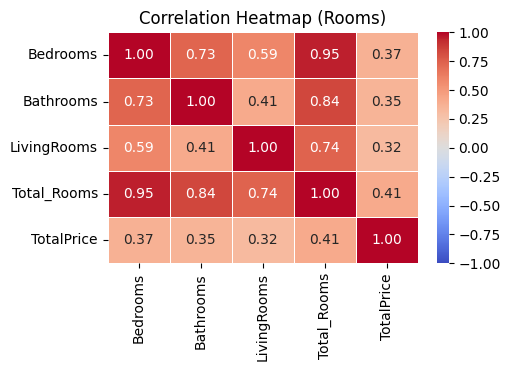

In [13]:
# Plot a Heatmap with rooms
df_rooms = df[['Bedrooms', 'Bathrooms', 'LivingRooms', 'Total_Rooms', 'TotalPrice']]
title = 'Rooms'
pa.important_features_heatmap(df_rooms, title)

In [14]:
df.drop(columns=['Bedrooms', 'Bathrooms', 'LivingRooms'], axis=1, inplace=True)

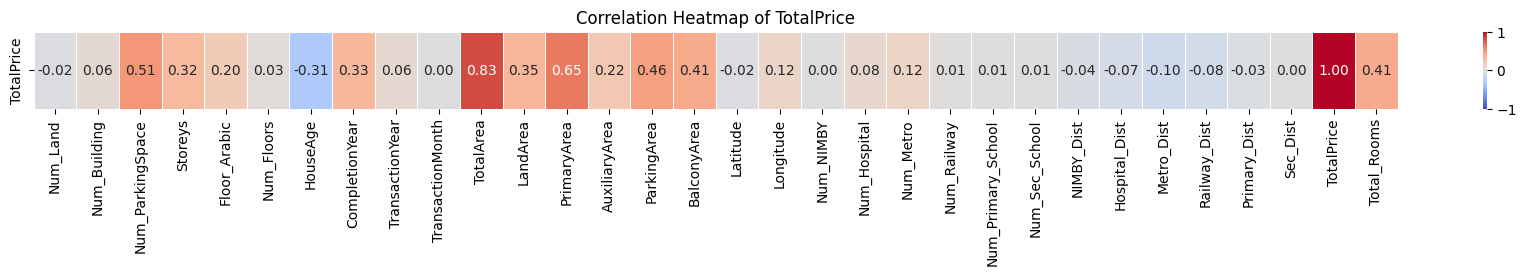

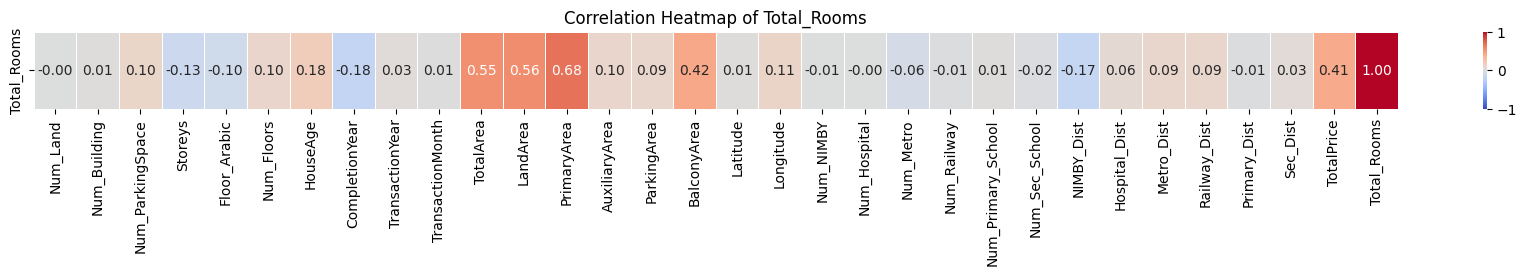

In [15]:
pa.one_column_heatmap(df, 'TotalPrice')
pa.one_column_heatmap(df, 'Total_Rooms')

# TotalArea

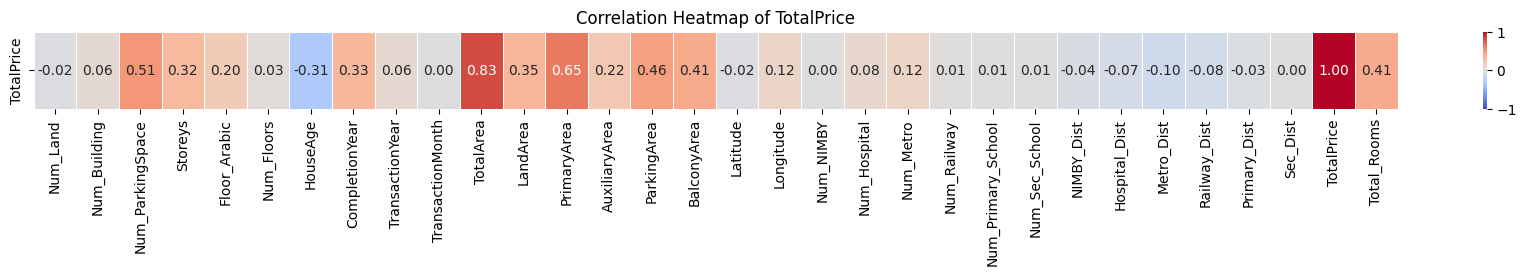

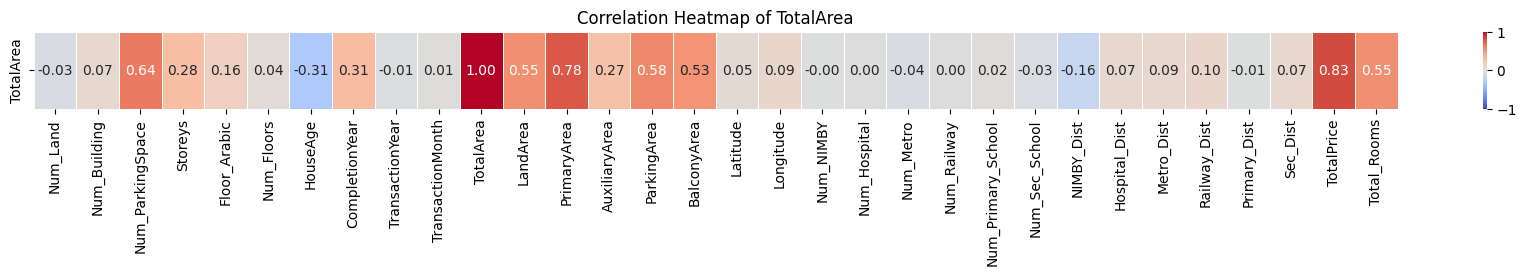

In [16]:
pa.one_column_heatmap(df, 'TotalPrice')
pa.one_column_heatmap(df, 'TotalArea')

In [17]:
# See features have a correlation greater than 0.7 with the TotalArea
df_target = df.select_dtypes(include = ['float64', 'int64'])
important_num = df_target.corr().loc['TotalArea', (abs(df_target.corr()).TotalArea > 0.6)& (df_target.corr().TotalArea != 1)]
important_num

Num_ParkingSpace    0.637337
PrimaryArea         0.776412
TotalPrice          0.826590
Name: TotalArea, dtype: float64

In [18]:
columns = ['TotalPrice']
filtered_important_num = {key: value for key, value in important_num.items() if key not in columns}
filtered_important_num.keys()

dict_keys(['Num_ParkingSpace', 'PrimaryArea'])

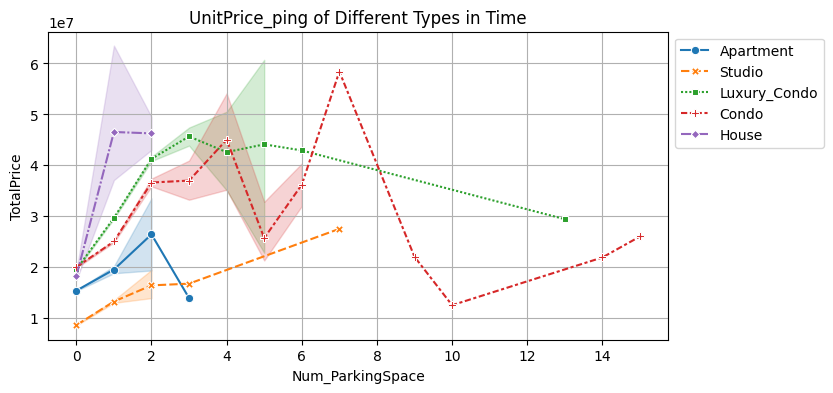

In [19]:
# UnitPrice_ping of Different Types in Time (line plot)
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Num_ParkingSpace', y='TotalPrice', hue='Type', style='Type', markers=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('UnitPrice_ping of Different Types in Time')
plt.grid(True)
plt.show()

In [20]:
df.drop(columns=filtered_important_num.keys(), axis=1, inplace=True)

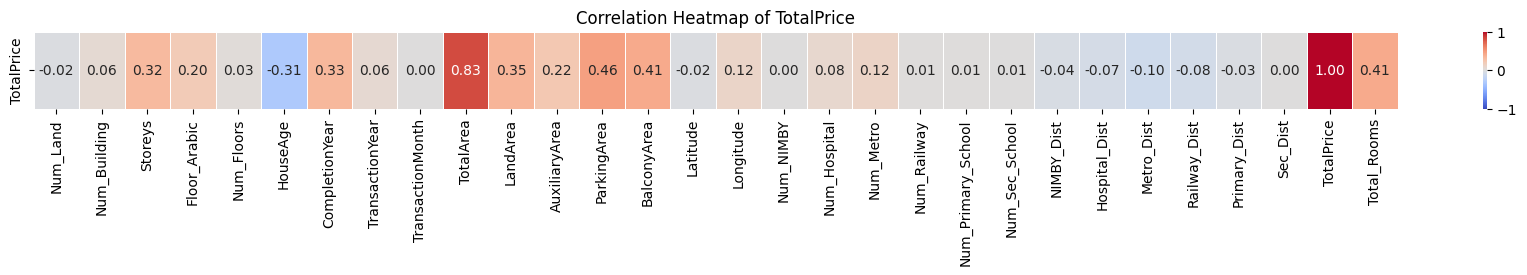

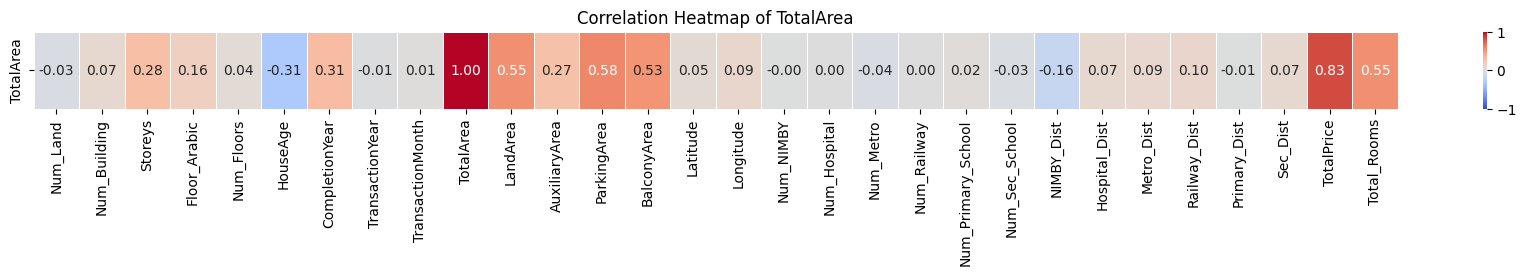

In [21]:
pa.one_column_heatmap(df, 'TotalPrice')
pa.one_column_heatmap(df, 'TotalArea')

# HouseAge

In [22]:
df_target = df.select_dtypes(include = ['float64', 'int64'])

In [23]:
# See features have a correlation greater than 0.6 with the HouseAge
important_num = df_target.corr().loc['HouseAge', (abs(df_target.corr()).HouseAge > 0.6)& (df_target.corr().HouseAge != 1)]
important_num

CompletionYear   -0.981178
Name: HouseAge, dtype: float64

In [24]:
df_target.drop(columns=important_num.keys(), axis=1, inplace=True)

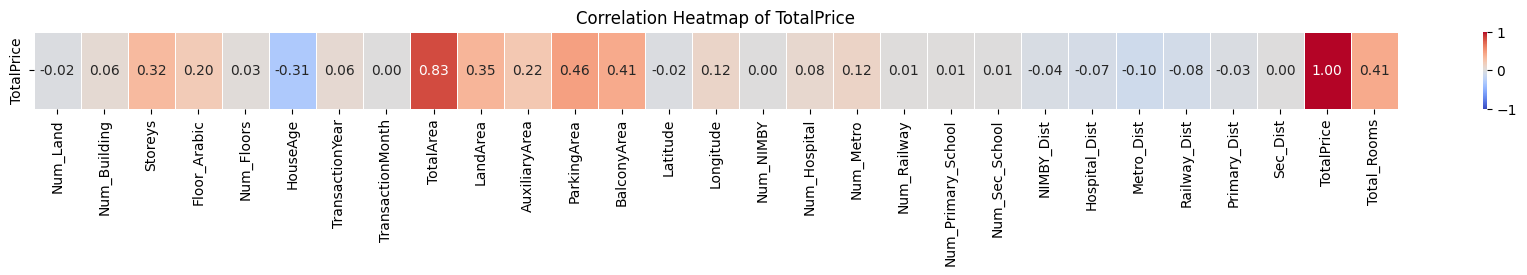

In [25]:
pa.one_column_heatmap(df_target, 'TotalPrice')

In [26]:
important_num = df_target.corr().loc['TotalPrice', (abs(df_target.corr()).TotalPrice > 0.2)& (df_target.corr().TotalPrice != 1)]
important_num

Storeys          0.315287
HouseAge        -0.309488
TotalArea        0.826590
LandArea         0.347350
AuxiliaryArea    0.220874
ParkingArea      0.463983
BalconyArea      0.409425
Total_Rooms      0.407952
Name: TotalPrice, dtype: float64

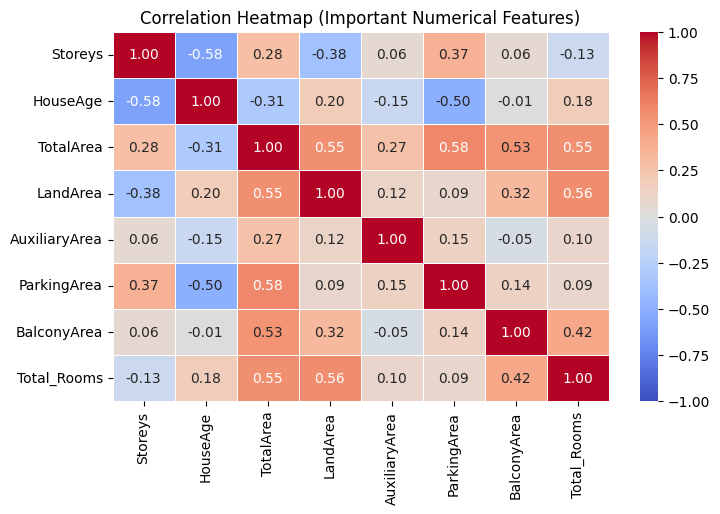

In [27]:
df_important = df[important_num.keys()]
title = 'Important Numerical Features'
pa.important_features_heatmap(df_important, title)

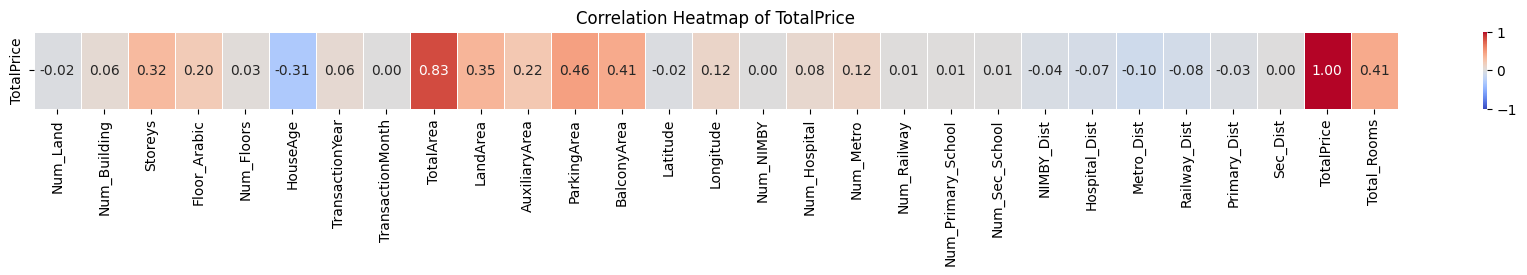

In [28]:
pa.one_column_heatmap(df_target, 'TotalPrice')

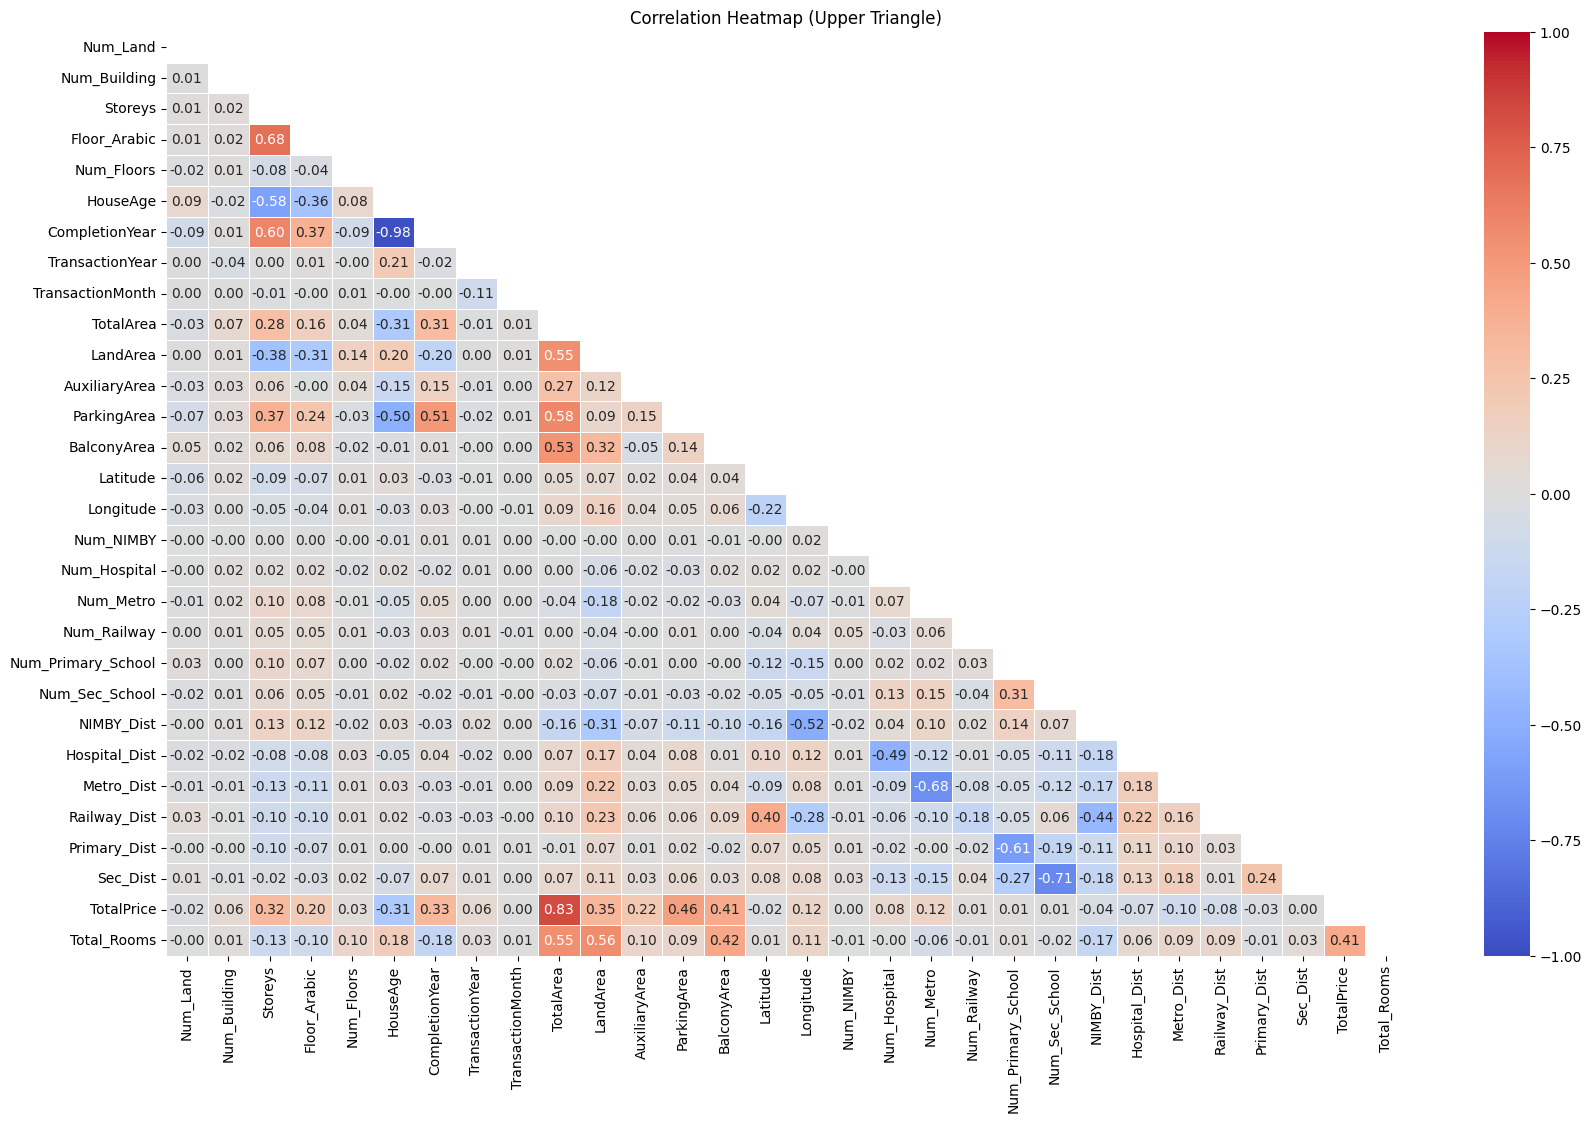

In [29]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df)

In [30]:
df.to_csv('9_feature_selection.csv', encoding='utf-8-sig', index=False)

# test

In [31]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

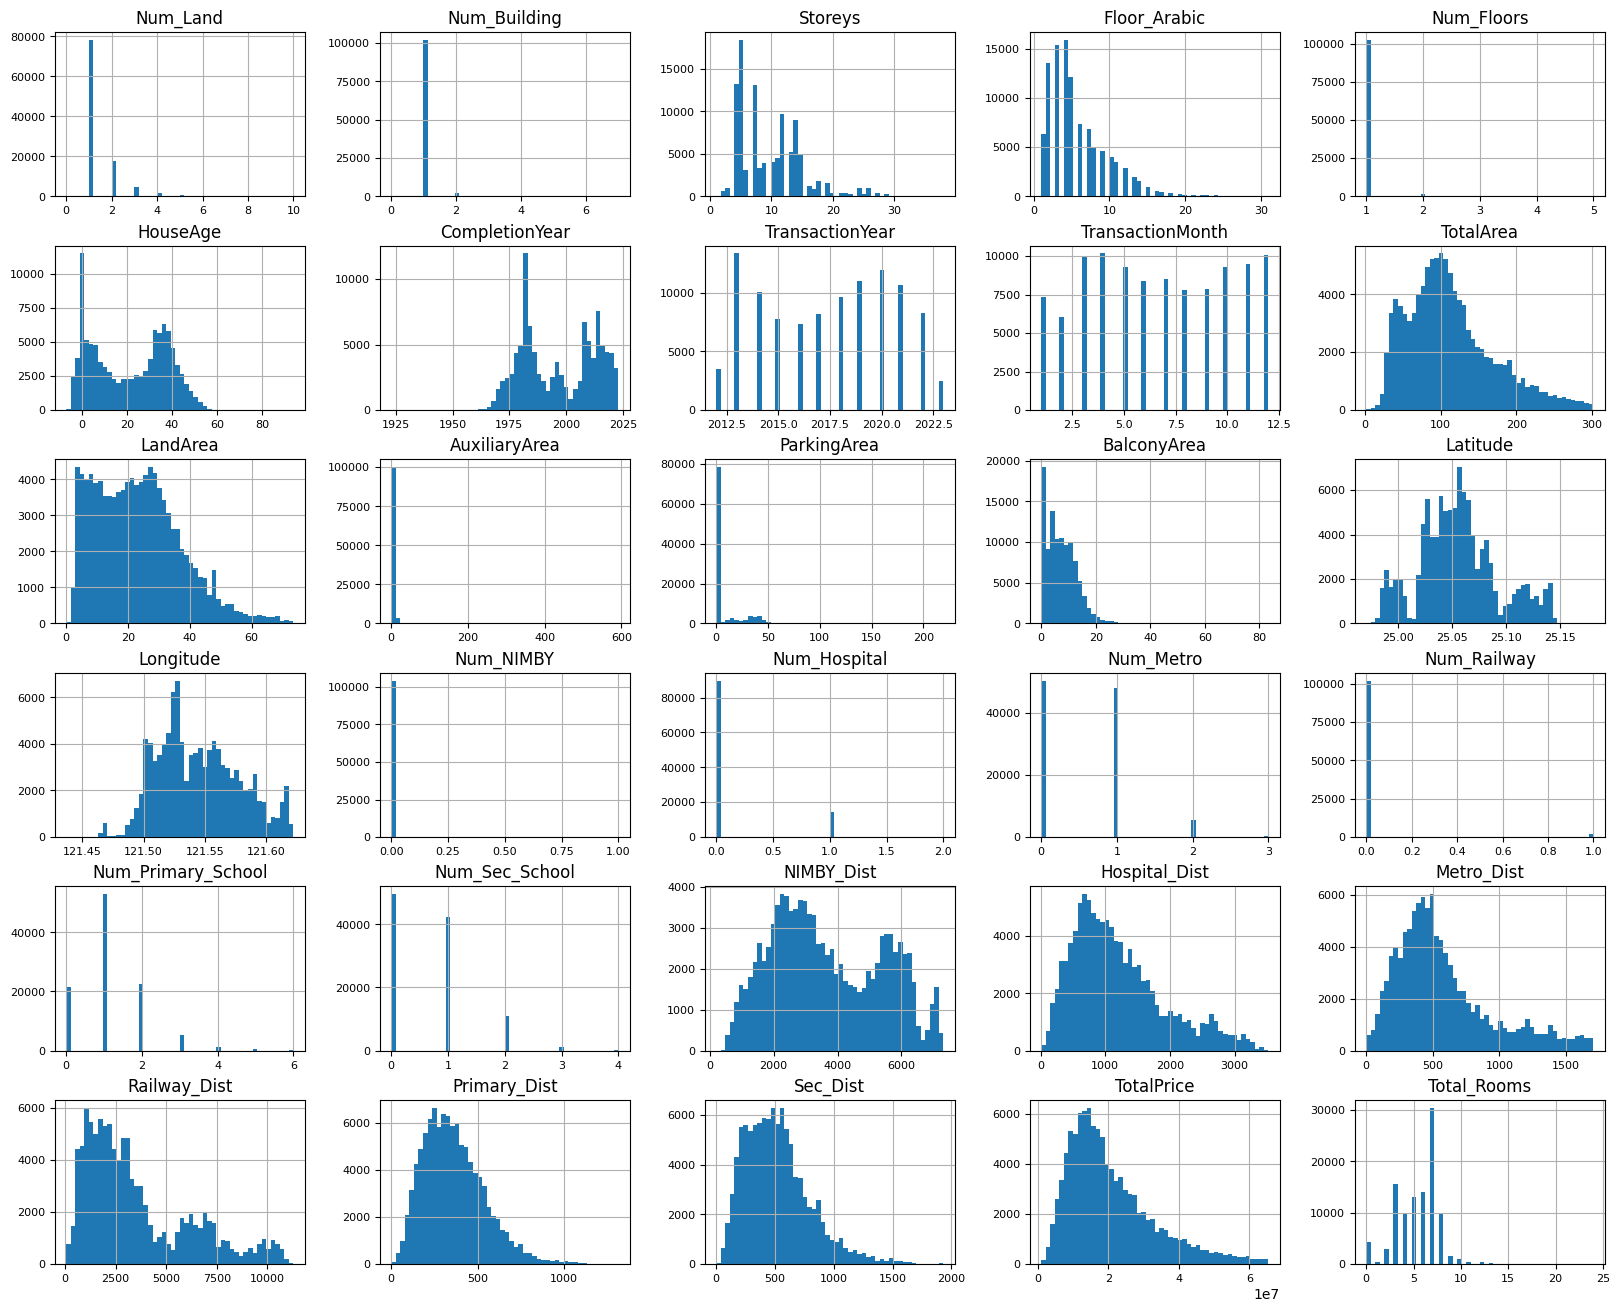

In [32]:
df_num.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
# summary statistics for numerical features
summary_stats = df_num.describe().T.round(2)
display(summary_stats)

count         mean          std         min  \
Num_Land            104260.0         1.39         0.89        0.00   
Num_Building        104260.0         1.02         0.17        0.00   
Storeys             104260.0         9.63         5.25        1.00   
Floor_Arabic        104260.0         5.73         3.93        1.00   
Num_Floors          104260.0         1.02         0.16        1.00   
HouseAge            104260.0        21.34        16.45       -7.00   
CompletionYear      104260.0      1996.08        16.08     1923.00   
TransactionYear     104260.0      2017.41         3.16     2012.00   
TransactionMonth    104260.0         6.69         3.43        1.00   
TotalArea           104260.0       112.95        57.53        1.49   
LandArea            104260.0        23.40        13.80        0.00   
AuxiliaryArea       104260.0         2.58         6.74        0.00   
ParkingArea         104260.0         8.46        16.98        0.00   
BalconyArea         104260.0         7.21         5.66        0.00   
Latitude            104260.0        25.06         0.04       24.97   
Longitude           104260.0       121.54         0.03      121.44   
Num_NIMBY           104260.0         0.00         0.01        0.00   
Num_Hospital        104260.0         0.14         0.35        0.00   
Num_Metro           104260.0         0.57         0.60        0.00   
Num_Railway         104260.0         0.02         0.14        0.00   
Num_Primary_School  104260.0         1.17         0.90        0.00   
Num_Sec_School      104260.0         0.66         0.72        0.00   
NIMBY_Dist          104260.0      3662.60      1697.16      205.14   
Hospital_Dist       104260.0      1199.20       707.93        9.99   
Metro_Dist          104260.0       577.79       362.42        4.05   
Railway_Dist        104260.0      3537.52      2611.80       58.13   
Primary_Dist        104260.0       362.31       177.22        0.20   
Sec_Dist            104260.0       520.32       278.53        0.46   
TotalPrice          104260.0  20741279.05  12257071.50  1000000.00   
Total_Rooms         104260.0         5.52         2.28        0.00   

                            25%          50%          75%          max  
Num_Land                   1.00         1.00         1.00        10.00  
Num_Building               1.00         1.00         1.00         7.00  
Storeys                    5.00         8.00        13.00        38.00  
Floor_Arabic               3.00         5.00         8.00        31.00  
Num_Floors                 1.00         1.00         1.00         5.00  
HouseAge                   5.00        23.00        36.00        94.00  
CompletionYear          1981.00      1995.00      2012.00      2023.00  
TransactionYear         2014.00      2018.00      2020.00      2023.00  
TransactionMonth           4.00         7.00        10.00        12.00  
TotalArea                 71.61       103.25       143.20       302.22  
LandArea                  12.01        22.33        31.97        73.54  
AuxiliaryArea              0.00         0.00         3.14       592.21  
ParkingArea                0.00         0.00         2.42       219.38  
BalconyArea                3.09         6.56        10.92        83.30  
Latitude                  25.03        25.05        25.08        25.18  
Longitude                121.52       121.54       121.57       121.62  
Num_NIMBY                  0.00         0.00         0.00         1.00  
Num_Hospital               0.00         0.00         0.00         2.00  
Num_Metro                  0.00         1.00         1.00         3.00  
Num_Railway                0.00         0.00         0.00         1.00  
Num_Primary_School         1.00         1.00         2.00         6.00  
Num_Sec_School             0.00         1.00         1.00         4.00  
NIMBY_Dist              2304.21      3341.82      5232.50      7315.41  
Hospital_Dist            667.62      1051.36      1568.37      3525.25  
Metro_Dist               33

In [34]:
# See features have a correlation greater than 0.2 with the TotalPrice
important_num = df_num.corr().loc['TotalPrice', (abs(df_num.corr()).TotalPrice > 0.2)& (df_num.corr().TotalPrice != 1)]
important_num

Storeys           0.315287
HouseAge         -0.309488
CompletionYear    0.328975
TotalArea         0.826590
LandArea          0.347350
AuxiliaryArea     0.220874
ParkingArea       0.463983
BalconyArea       0.409425
Total_Rooms       0.407952
Name: TotalPrice, dtype: float64

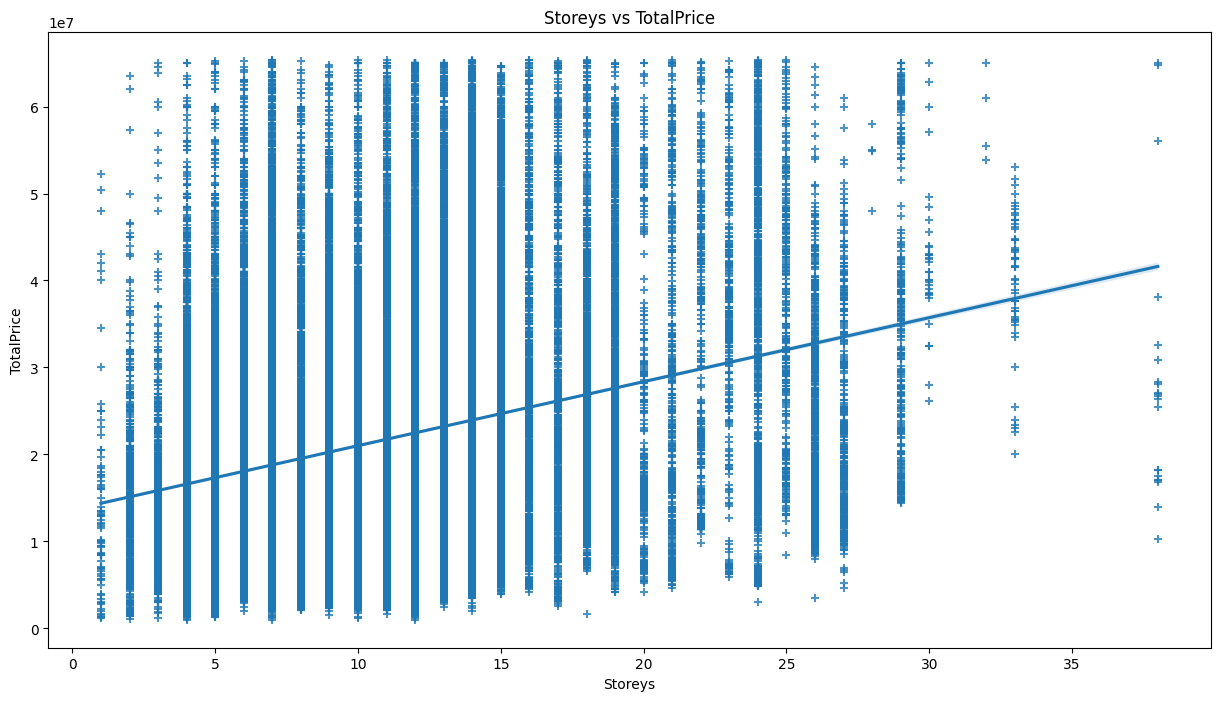

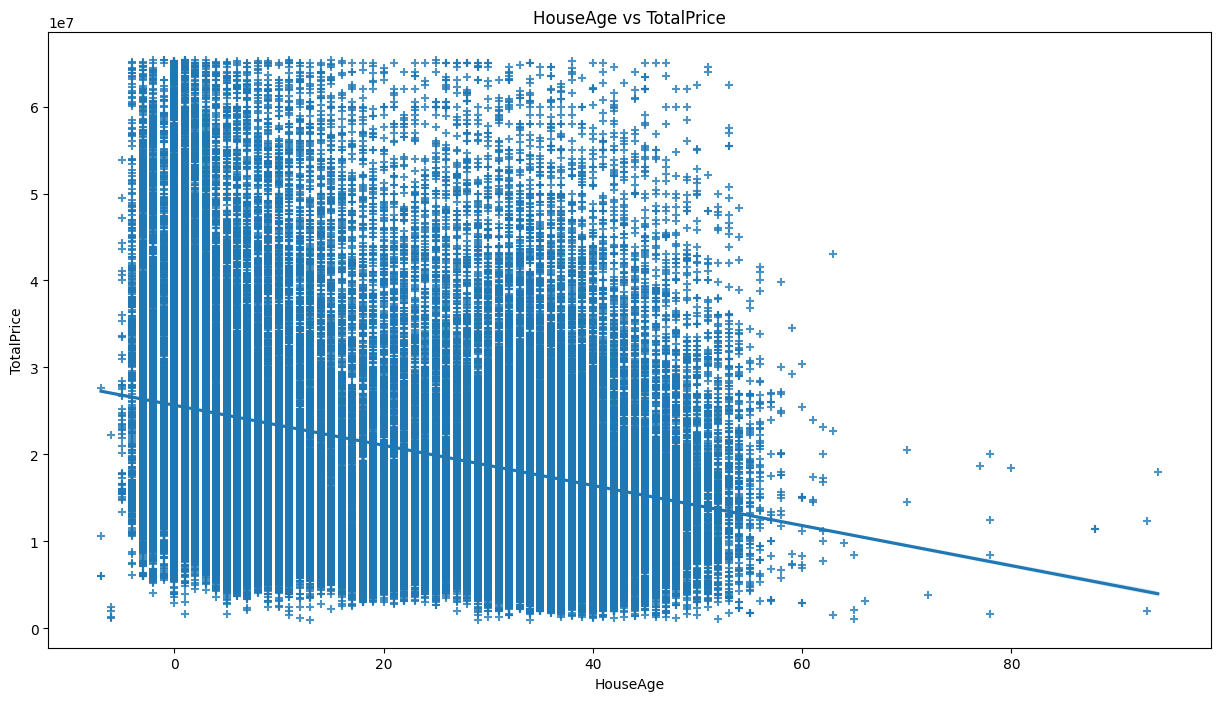

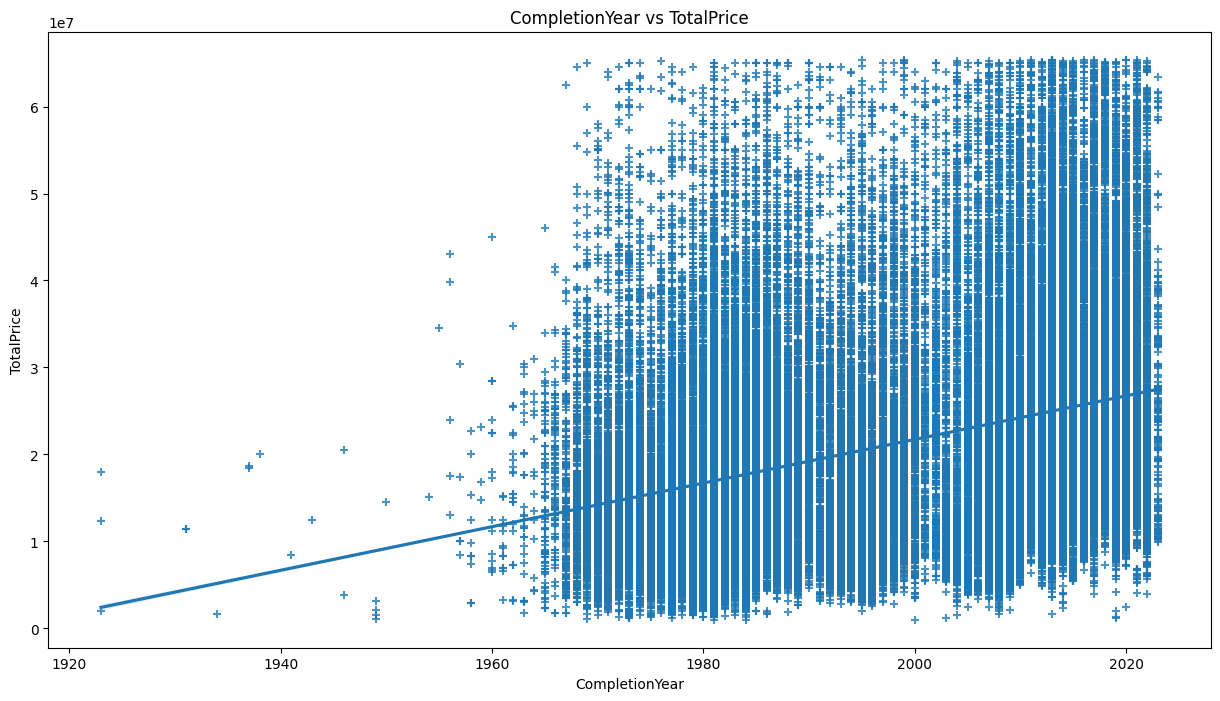

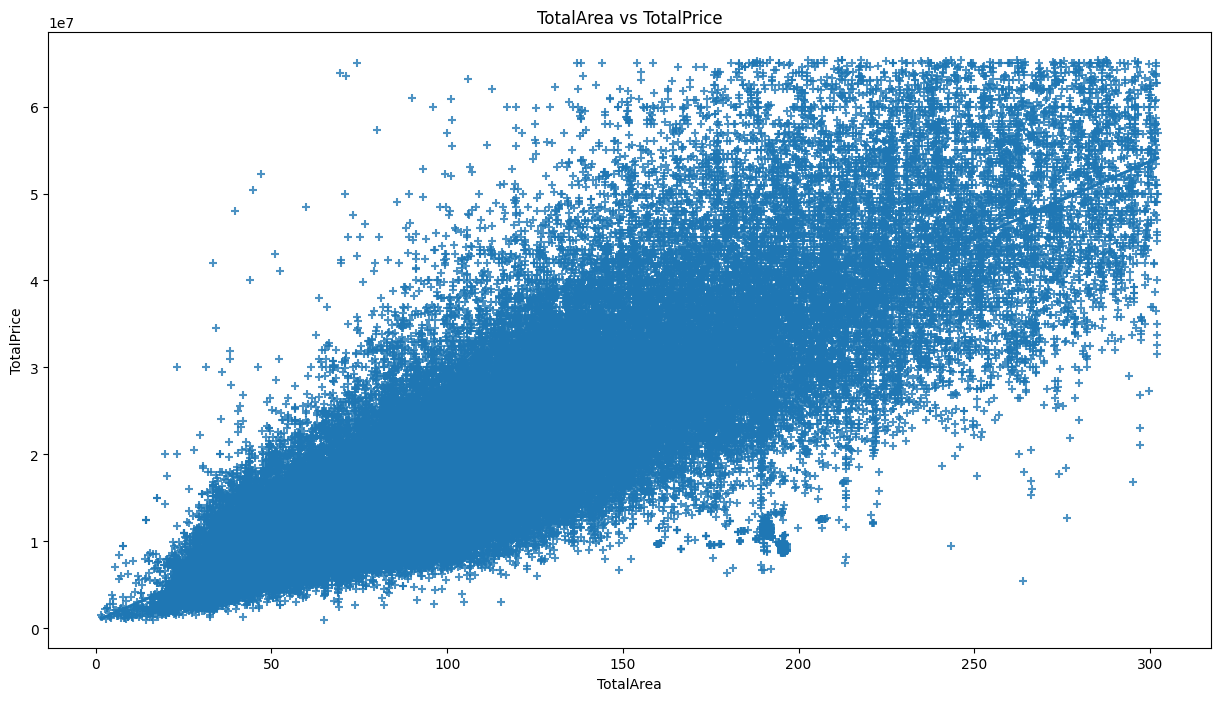

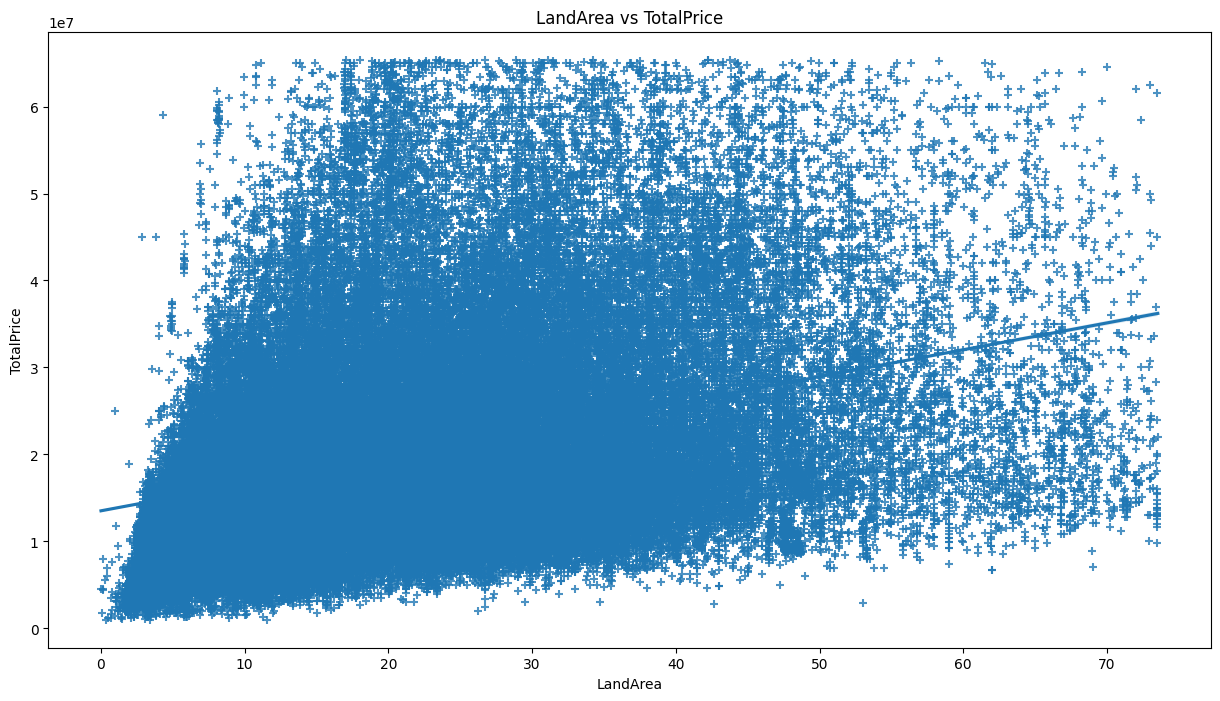

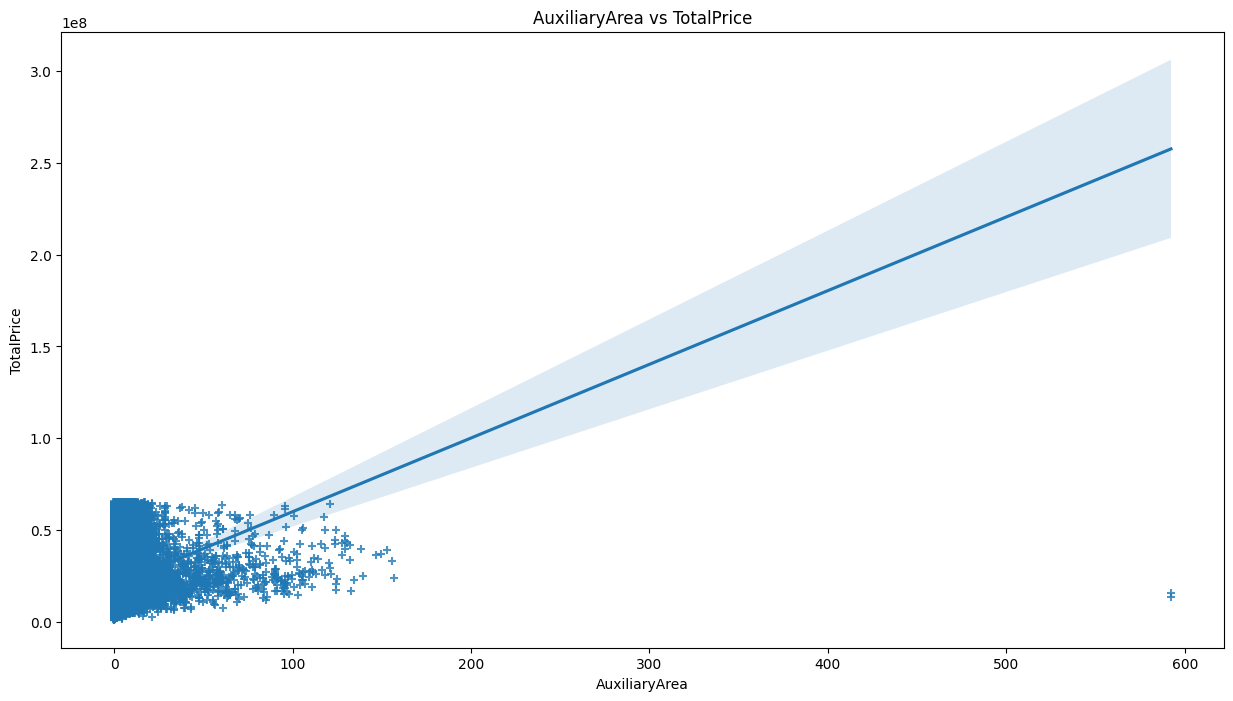

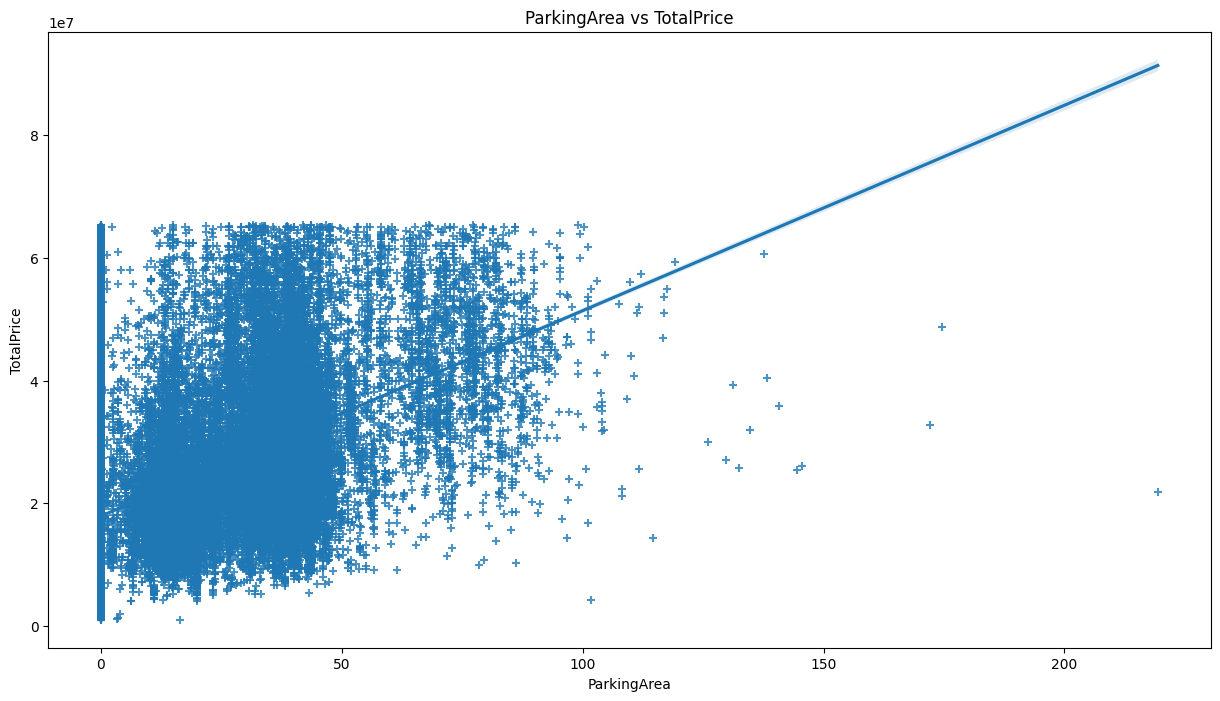

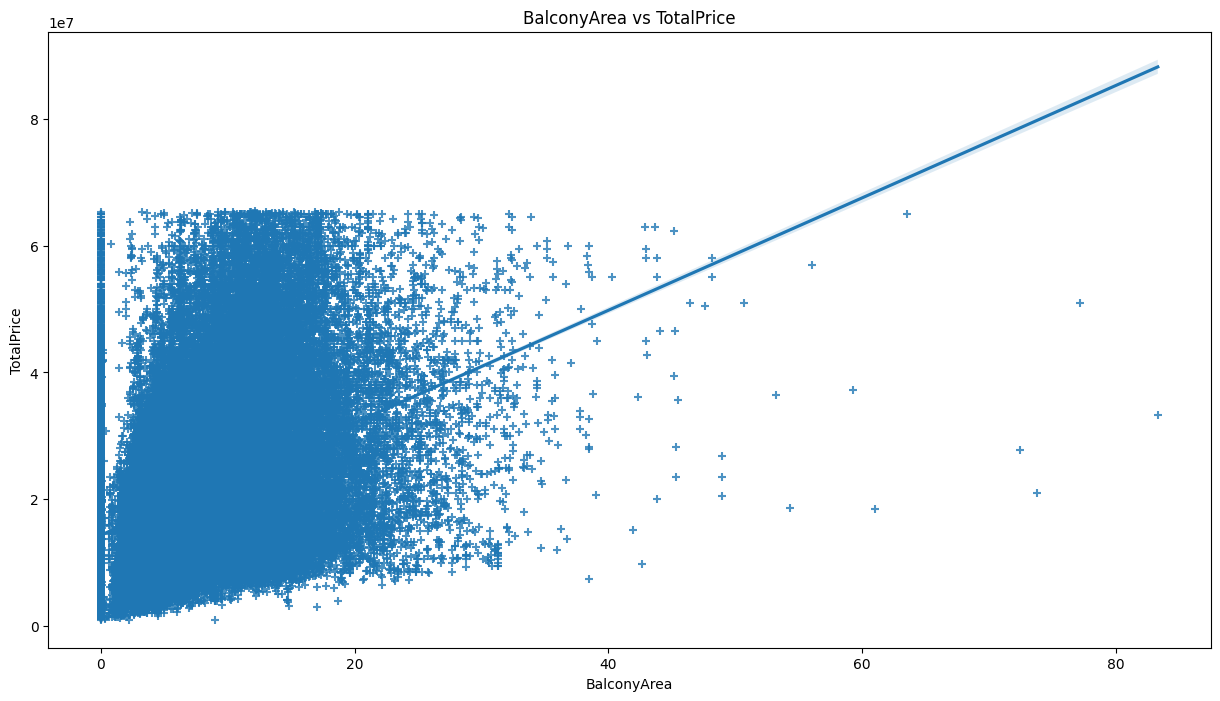

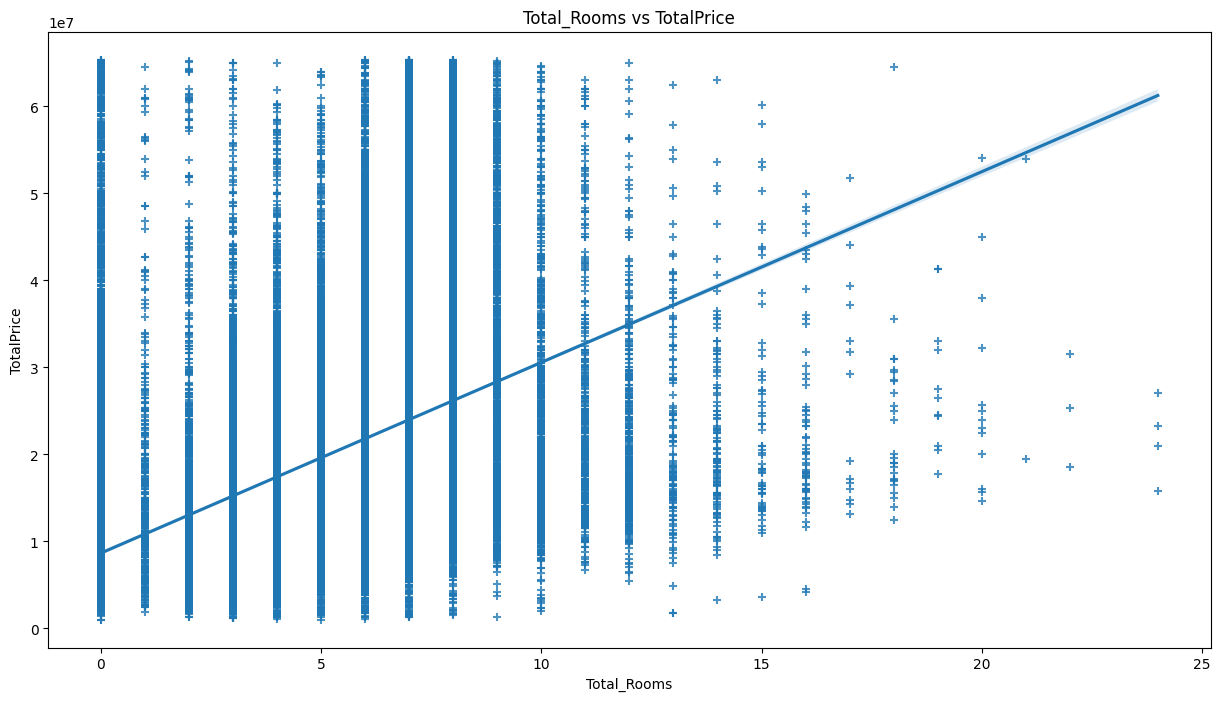

In [35]:
# Plot the correlation scatter plot
for feature in important_num.index: 
    plt.figure(figsize=(15,8))
    sns.regression.regplot(x = df_num[feature], y = df_num['TotalPrice'], marker='+')
    plt.title(feature + ' vs TotalPrice')

# 9-2. Classification Data

# 9-3. Boolean Type Data